In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from datetime import datetime
import matplotlib.dates as mdates

import os
import random
import warnings
warnings.filterwarnings('ignore')

In [43]:
import kagglehub

path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3


In [45]:
filename = "PJME_hourly.csv"
file_path = os.path.join(path, filename)

df = pd.read_csv(file_path, parse_dates=['Datetime'], index_col='Datetime')

df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [48]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [52]:
print(df.isnull().sum())

PJME_MW    0
dtype: int64


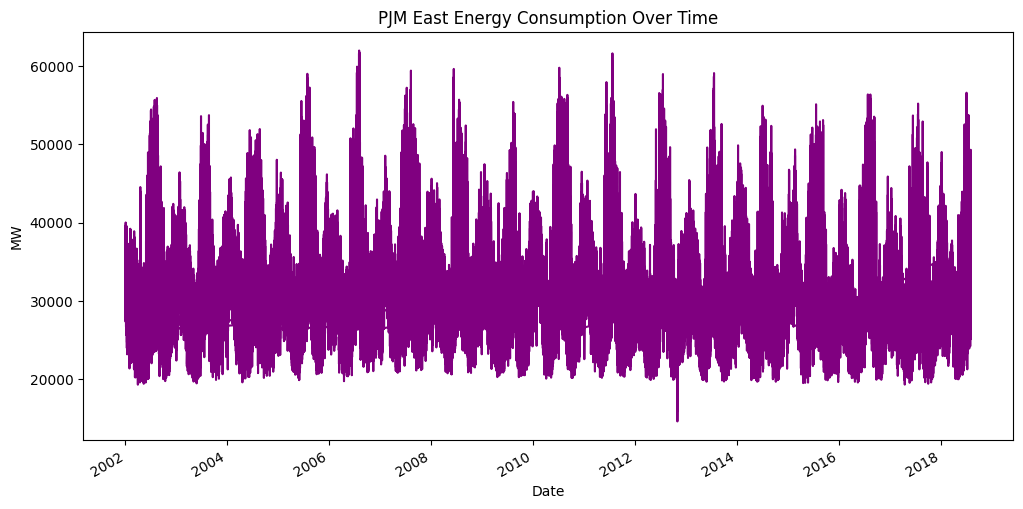

In [84]:
plt.figure(figsize=(12, 6))
df['PJME_MW'].plot(title="PJM East Energy Consumption Over Time", ylabel="MW", color='purple')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

Text(0.5, 0, 'Date')

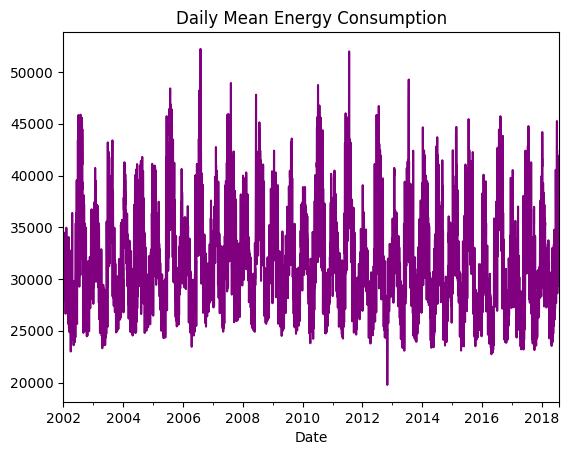

In [82]:
df_daily = df['PJME_MW'].resample('D').mean()
df_daily.plot(title="Daily Mean Energy Consumption", color='purple')
plt.xlabel('Date')

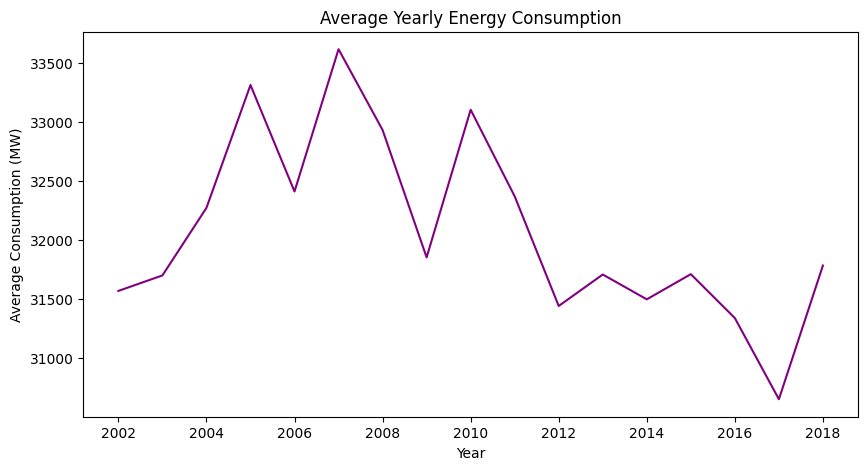

In [81]:
df['Year'] = df.index.year
yearly_avg = df.groupby('Year')['PJME_MW'].mean()

plt.figure(figsize=(10, 5))
yearly_avg.plot(color='purple')
plt.title('Average Yearly Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Average Consumption (MW)')
plt.show()

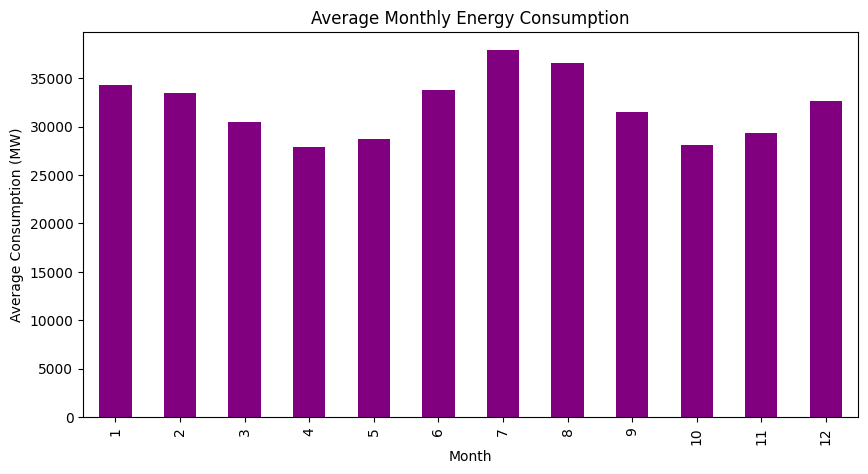

In [80]:

df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['PJME_MW'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='purple')
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption (MW)')
plt.show()

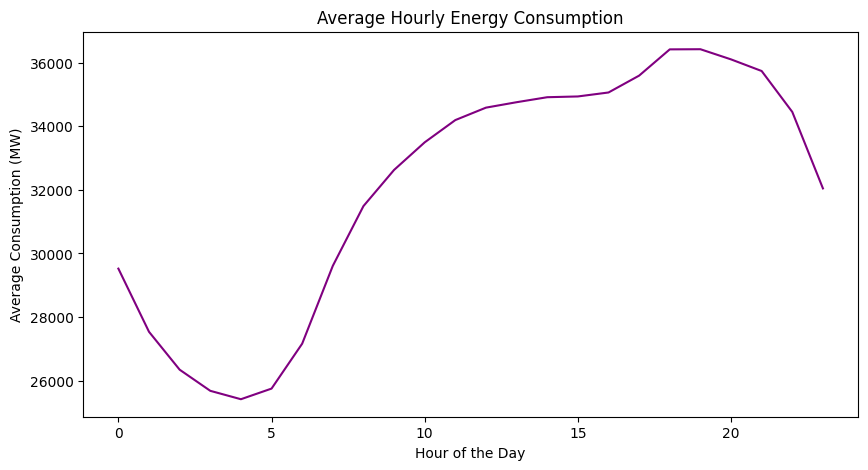

In [79]:

df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')['PJME_MW'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(color='purple')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Consumption (MW)')
plt.show()

In [61]:
df['lag_1'] = df['PJME_MW'].shift(1)
df['lag_2'] = df['PJME_MW'].shift(2)
df['lag_3'] = df['PJME_MW'].shift(3)

df.dropna(inplace=True)


In [62]:
X = df[['lag_1', 'lag_2', 'lag_3']]
y = df['PJME_MW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [63]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

In [64]:
y_pred = model.predict(X_test)


In [65]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}')


MAE: 503.64960960341216, MSE: 771539.4973586075


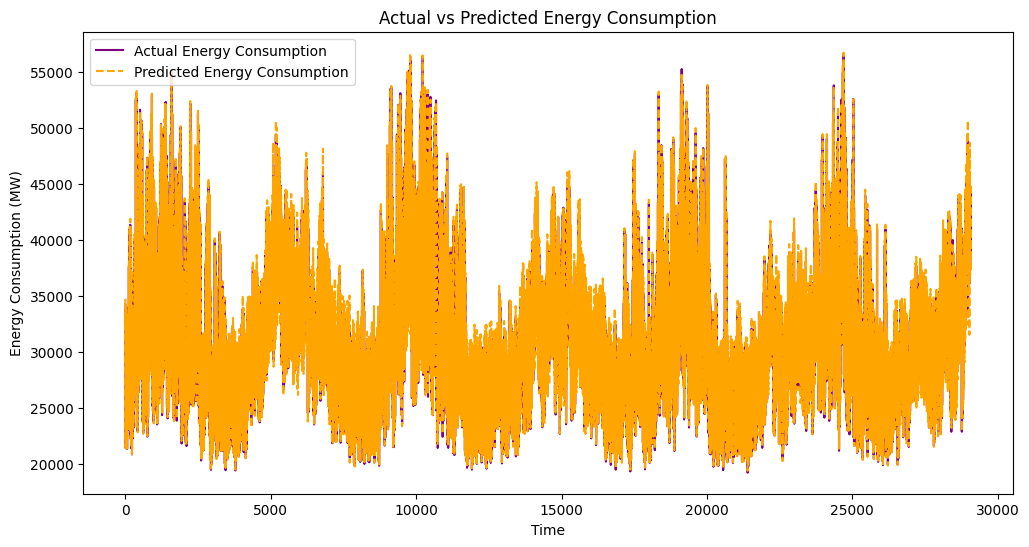

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='purple', label='Actual Energy Consumption')
plt.plot(y_pred, color='orange', linestyle='--', label='Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


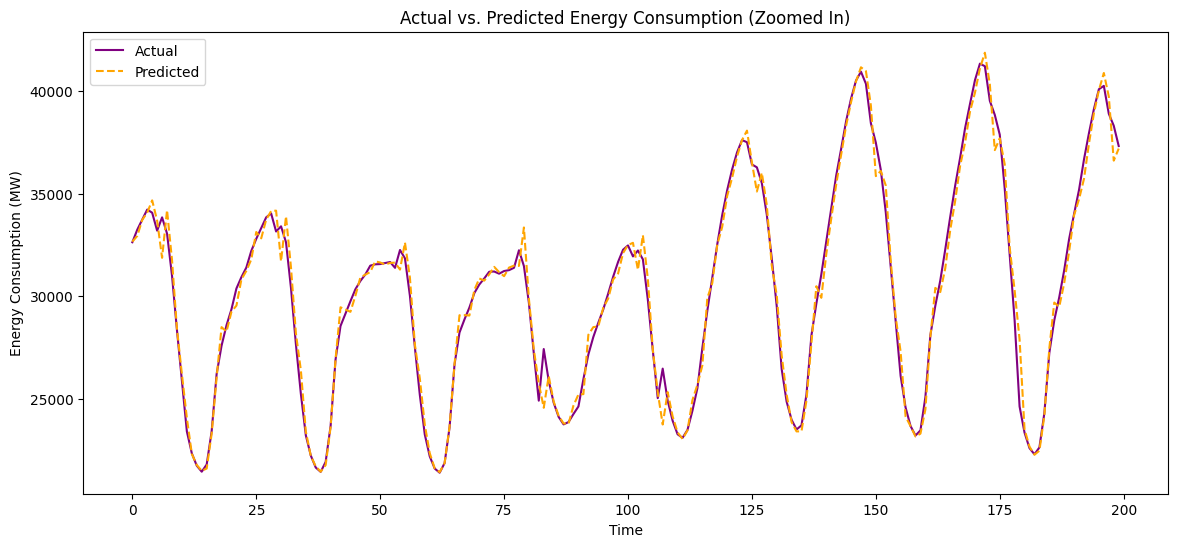

In [88]:

plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:200], label='Actual', color='purple')
plt.plot(y_pred[:200], label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs. Predicted Energy Consumption (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


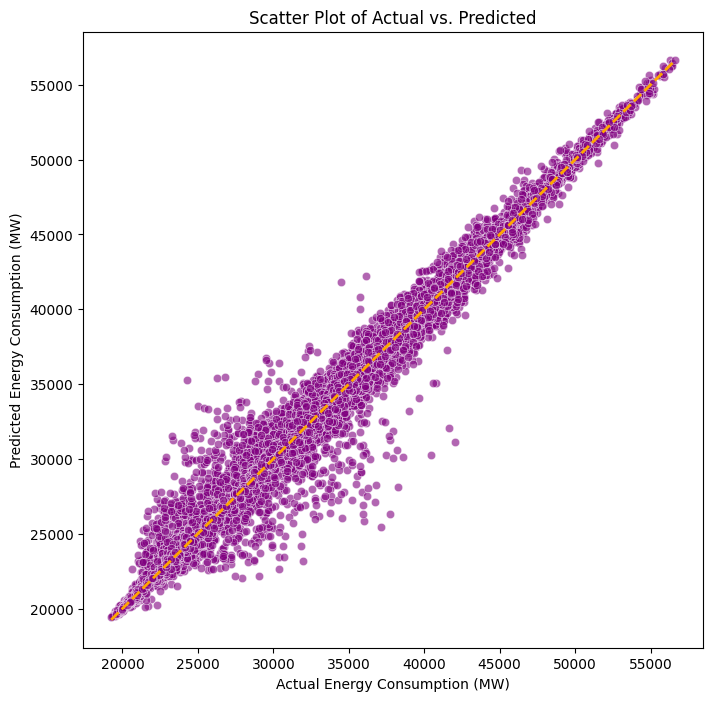

In [89]:

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test.values, y=y_pred, color="purple", alpha=0.6)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='orange', linestyle='--', linewidth=2)
plt.title('Scatter Plot of Actual vs. Predicted')
plt.xlabel('Actual Energy Consumption (MW)')
plt.ylabel('Predicted Energy Consumption (MW)')
plt.show()



In [91]:
import joblib

# Save model
joblib.dump(model, 'energy_forecast_model.pkl')
# Save scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [92]:
from google.colab import files

# Download model and scaler files
files.download('energy_forecast_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>